In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


## Task:
Draw realizations from GPs and predictive means and uncertainty intervals, that is, redo all the plots below by yourself, and generate the codes.

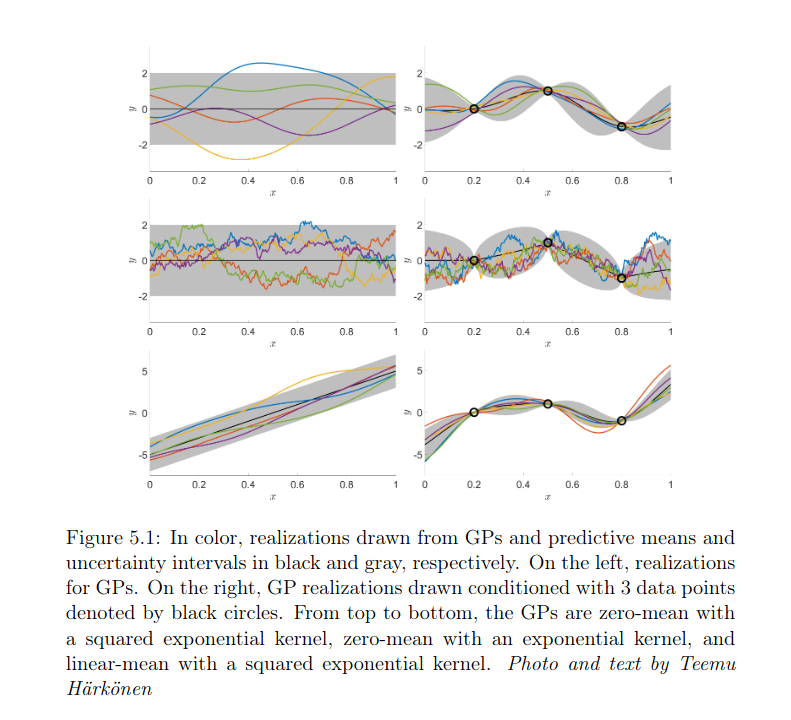

We shall use [scikit-learn's](https://scikit-learn.org/stable/modules/gaussian_process.html) gaussian process regression routines to complete this task.

In [56]:
# Adapted from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def plot_gpr_samples(gpr_model, n_samples, ax):
    x = np.linspace(0, 1, 1000)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std * 2,
        y_mean + y_std * 2,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 2 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

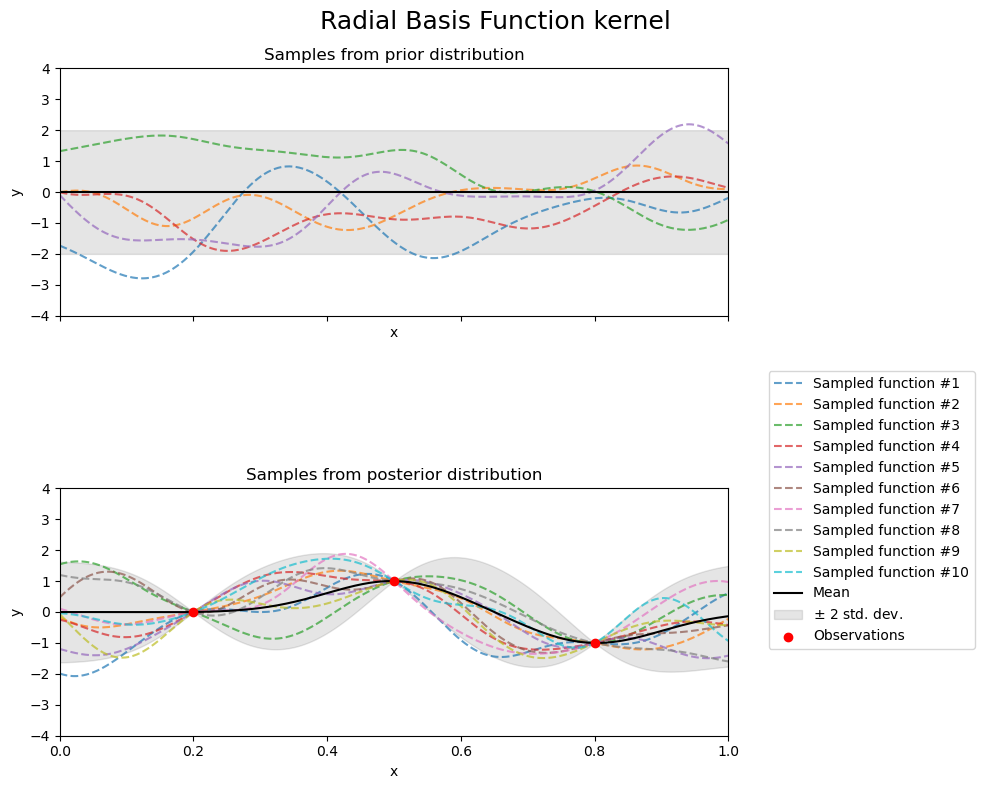

In [75]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

n_samples = 10
X = np.linspace(0, 1, num=1_000).reshape(-1,1)
X_train, y_train = np.array([.2, .5, .8]).reshape(-1,1), np.array([0, 1, -1])

kernel = 1 * RBF(length_scale=.1, length_scale_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

plot_gpr_samples(gaussian_process, n_samples=5, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

gaussian_process.fit(X_train, y_train)
plot_gpr_samples(gaussian_process, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

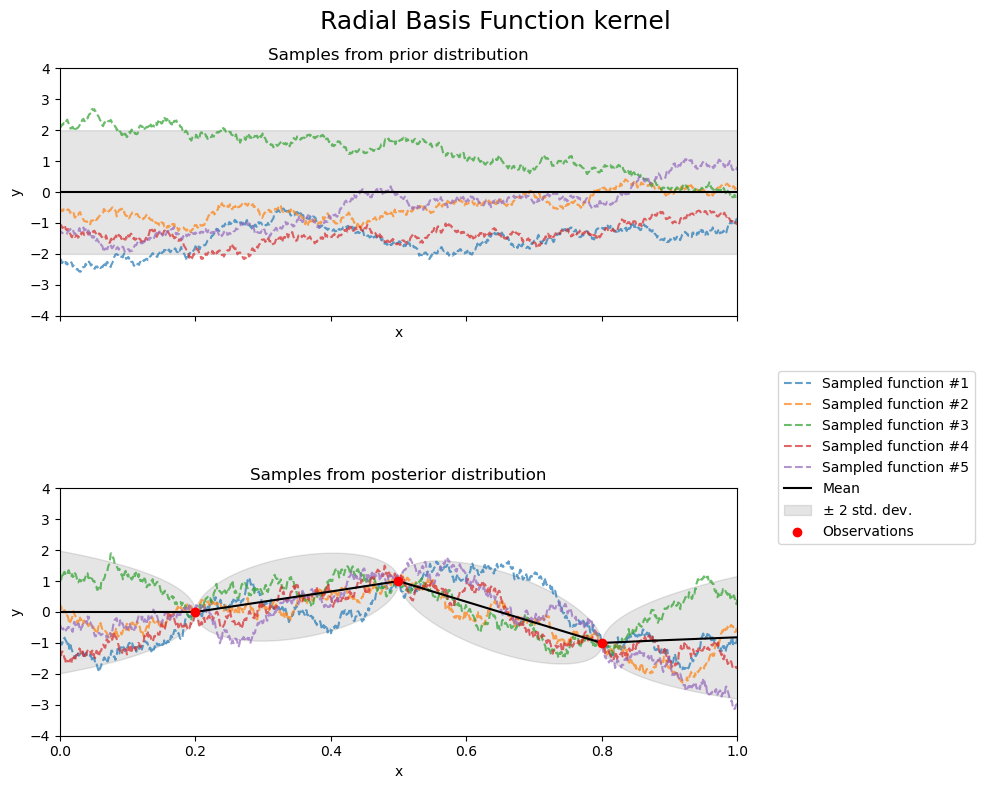

In [77]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

n_samples = 5
X = np.linspace(0, 1, num=1_000).reshape(-1,1)
X_train, y_train = np.array([.2, .5, .8]).reshape(-1,1), np.array([0, 1, -1])

kernel = 1 * Matern(length_scale=1,
                      length_scale_bounds='fixed', 
                      nu=.5 # Equivalent to abs exp kernel
                      )
gaussian_process = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

plot_gpr_samples(gaussian_process, n_samples=5, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

gaussian_process.fit(X_train, y_train)
plot_gpr_samples(gaussian_process, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

/home/tornikeo/miniconda3/envs/spe/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter kernel__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


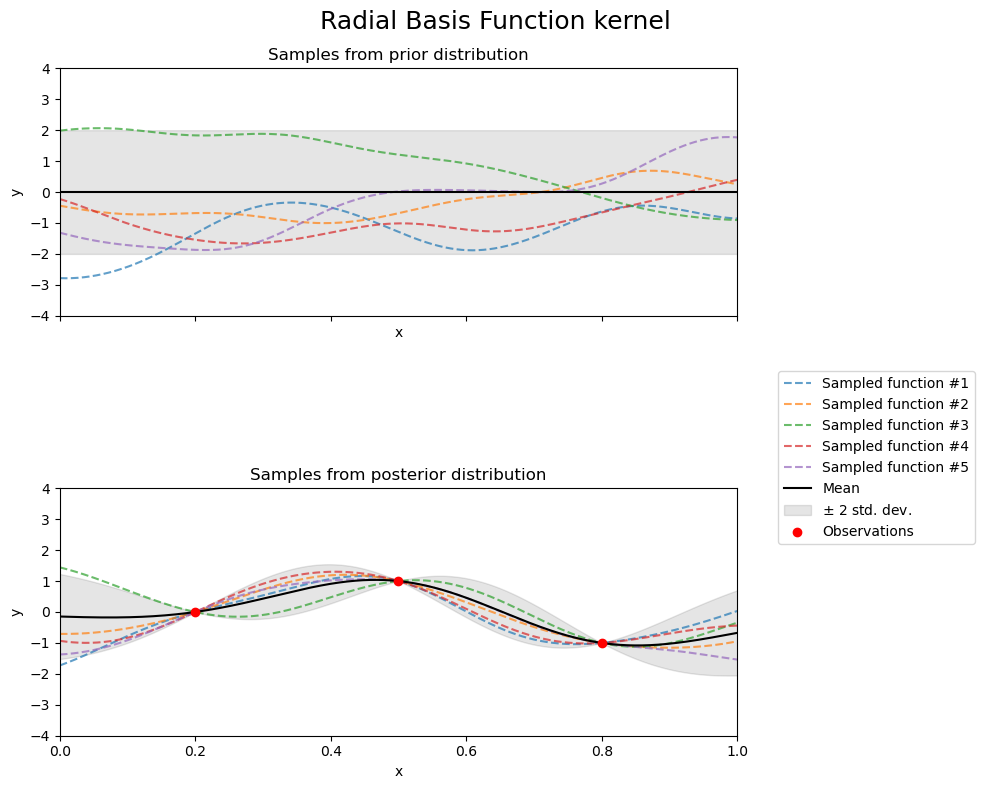

In [277]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import \
    Matern, Sum, DotProduct, WhiteKernel, ConstantKernel, \
        RationalQuadratic

n_samples = 5
X = np.linspace(0, 1, num=1_000).reshape(-1,1)

X_train = np.array([.2, .5, .8]).reshape(-1,1)
y_train = np.array([0, 1, -1])

# kernel =  DotProduct(sigma_0=1, sigma_0_bounds='fixed') * Matern(length_scale=.1, length_scale_bounds='fixed', nu=2.5) + (RBF(1, length_scale_bounds='fixed')) ** 2
# kernel = RationalQuadratic(length_scale=1, alpha=2.5, length_scale_bounds='fixed') * (DotProduct(sigma_0=1, sigma_0_bounds='fixed')**2)
kernel = (RationalQuadratic(length_scale=.25, alpha=2.5, length_scale_bounds='fixed')) ** 2
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

plot_gpr_samples(gaussian_process, n_samples=5, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

gaussian_process.fit(X_train, y_train)
plot_gpr_samples(gaussian_process, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")
axs[0].set_xlim([0, 1])
axs[0].set_ylim([-4, 4])

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

**Argh.... Why doesn't it go UP**?

Here, this cubic function works well (below), but why doesn't this one work?

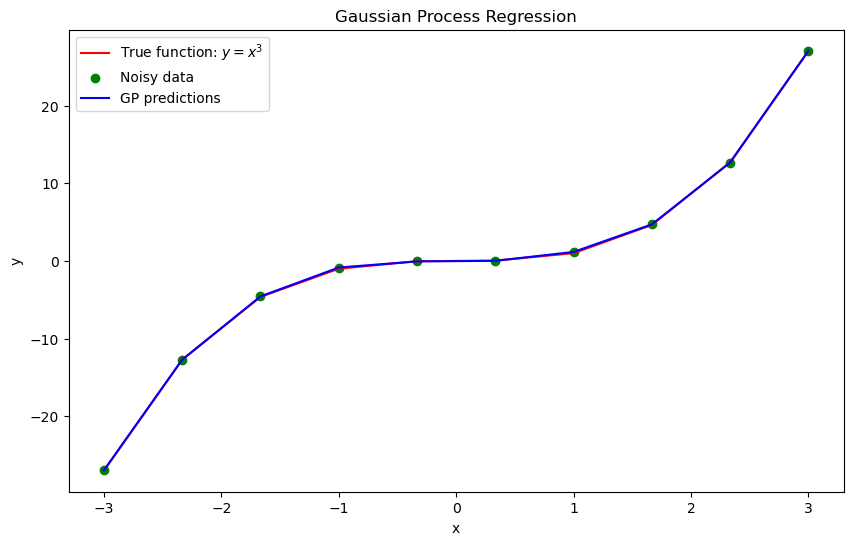

In [176]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic

# Define the kernel
kernel = RationalQuadratic(length_scale=1.0, alpha=0.1)

# Define the range of x values
x = np.linspace(-3, 3, 10).reshape(-1, 1)

# Define the true function y = x^3
y_true = x ** 3

# Generate some noisy data points around the true function
rng = np.random.RandomState(42)
y = y_true + 0.1 * rng.randn(len(x), 1)

# Fit the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(x, y)

# Make predictions for new values of x
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the true function, noisy data, and GP predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'r-', label='True function: $y = x^3$')
plt.scatter(x, y, c='g', label='Noisy data')
plt.plot(x, y_pred, 'b-', label='GP predictions')
plt.fill_between(x.ravel(), y_pred.ravel() - 1.96 * sigma, y_pred.ravel() + 1.96 * sigma, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
